In [1]:
import sys
import os
os.chdir("../../")
sys.path.append("../LocalGraphClustering/")
import localgraphclustering as lgc
from localgraphclustering.find_clusters import semisupervised_learning_with_improve,semisupervised_learning
from collections import Counter,defaultdict
import numpy as np
import matplotlib.pyplot as plt

# MNIST knn network

In [2]:
import numpy as np
import mnist
import scipy.misc

images = mnist.train_images()
labels = mnist.train_labels()

In [3]:
image_data = np.zeros((images.shape[0],images.shape[1]*images.shape[2]),dtype=np.float32)

In [4]:
for i,im in enumerate(images):
    image_data[i,:] = (im.astype("float32")/255).flatten()

In [ ]:
# from sklearn.neighbors import kneighbors_graph
# knn = kneighbors_graph(image_data,10,n_jobs=40,mode='distance')
# import scipy.sparse as sp

# A = sp.csr_matrix(knn)
# sel = A.T > A
# A = A - A.multiply(sel) + A.T.multiply(sel)
# A.data = np.exp(-0.5*(A.data**2))

In [ ]:
# import pickle
# wptr = open("dataset/MNIST_10_knn.p","wb")
# pickle.dump(A,wptr)
# wptr.close()

In [5]:
import pickle
import scipy.sparse as sp
rptr = open("dataset/MNIST_10_knn.p","rb")
A = pickle.load(rptr)
rptr.close()

# A = A.multiply(A>1.0e-6)
# A.eliminate_zeros()

In [6]:
g = lgc.GraphLocal.from_sparse_adjacency(A)
g.discard_weights()
clusters = defaultdict(list)
for i,l in enumerate(labels):
    clusters[l].append(i)

g.connected_components()
largest_component= set(np.nonzero(g.components == Counter(g.components).most_common()[0][0])[0])
g_copy = g.largest_component()
clusters_copy = defaultdict(list)
nnodes = 0
for i in range(g._num_vertices):
    if i in largest_component:
        clusters_copy[labels[i]].append(nnodes)
        nnodes += 1

There are  1  connected components in the graph
There are  1  connected components in the graph


## semi-supervised learning using subset of target cluster as seed nodes

In [7]:
kwargs_list = [{"method":"l1reg-rand",
                "alpha":0.01,
                "rho":1.0e-5,
                "normalize":False,
                "normalized_objective":False,
                "epsilon":1.0e-8,
                "iterations":1000000,
                "cpp":True,
                "delta":0.1,
                "delta1":0,
                "ratio":ratio} for ratio in 0.005*np.array(range(1,16))]

In [8]:
records_mnist = semisupervised_learning(g_copy,clusters_copy,kwargs_list,nprocs=80,flowmethod="sl")
# wptr = open("MNIST_ssl_sl.p","wb")
# pickle.dump(records_mnist,wptr)
# wptr.close()

Finished 0/450 experiments.
Finished 10/450 experiments.
Finished 20/450 experiments.
Finished 30/450 experiments.
Finished 40/450 experiments.
Finished 50/450 experiments.
Finished 60/450 experiments.
Finished 70/450 experiments.
Finished 80/450 experiments.
Finished 90/450 experiments.
Finished 100/450 experiments.
Finished 110/450 experiments.
Finished 120/450 experiments.
Finished 130/450 experiments.
Finished 140/450 experiments.
Finished 150/450 experiments.
Finished 160/450 experiments.
Finished 170/450 experiments.
Finished 180/450 experiments.
Finished 190/450 experiments.
Finished 200/450 experiments.
Finished 210/450 experiments.
Finished 220/450 experiments.
Finished 230/450 experiments.
Finished 240/450 experiments.
Finished 250/450 experiments.
Finished 260/450 experiments.
Finished 270/450 experiments.
Finished 280/450 experiments.
Finished 290/450 experiments.
Finished 300/450 experiments.
Finished 310/450 experiments.
Finished 320/450 experiments.
Finished 330/450 expe

In [6]:
# import pickle

# rptr = open("MNIST_ssl_sl.p","rb")
# records_mnist = pickle.load(rptr)
# rptr.close()

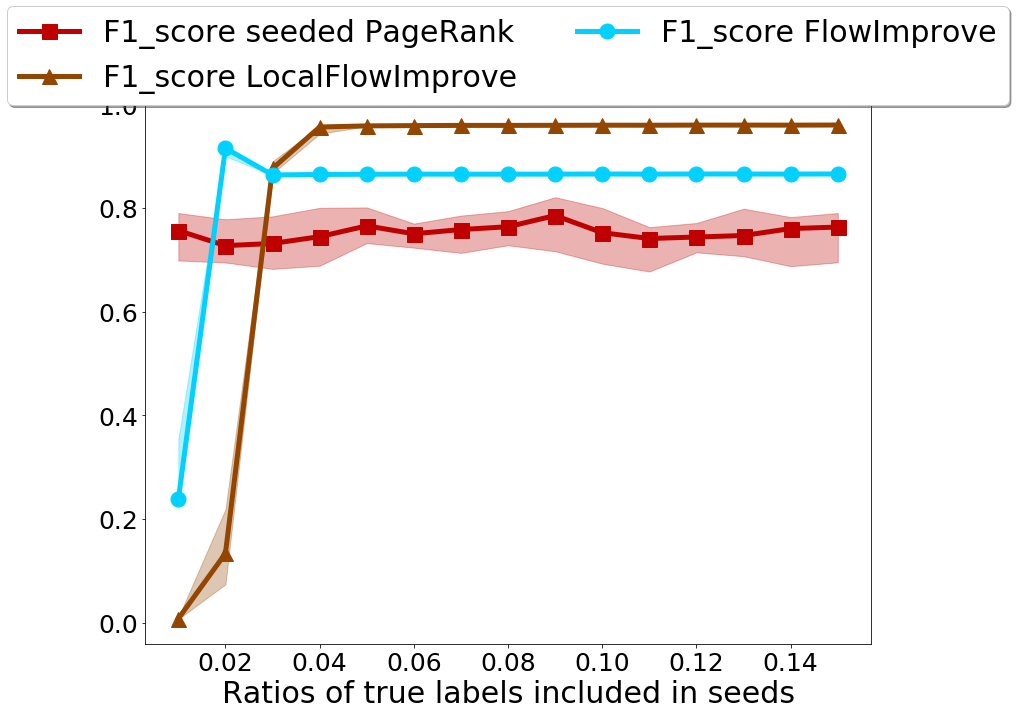

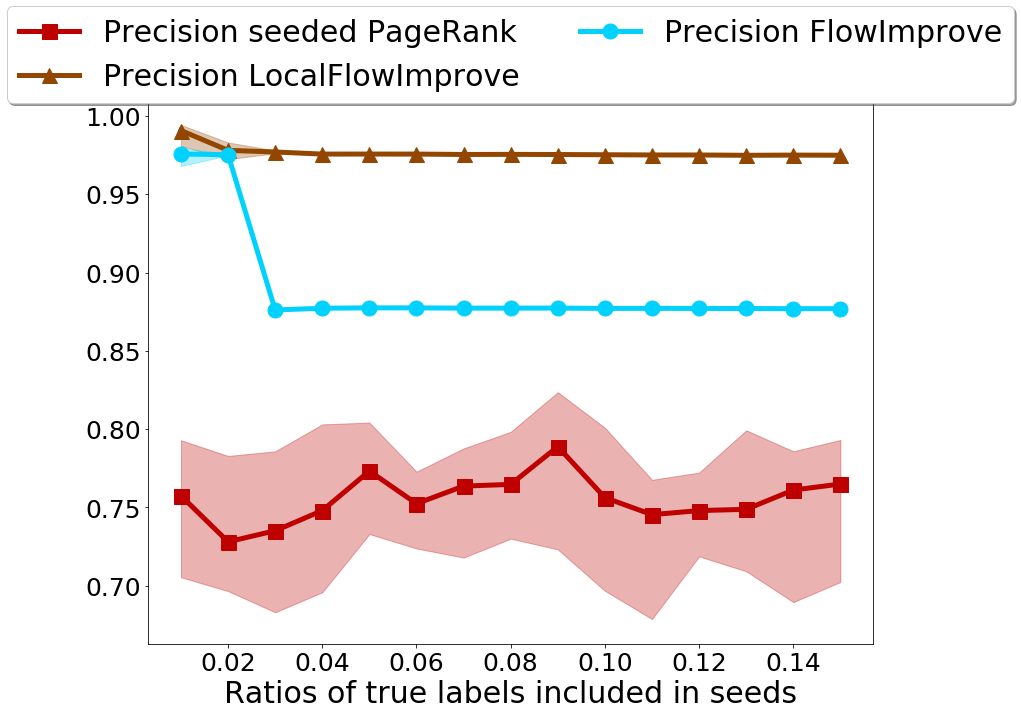

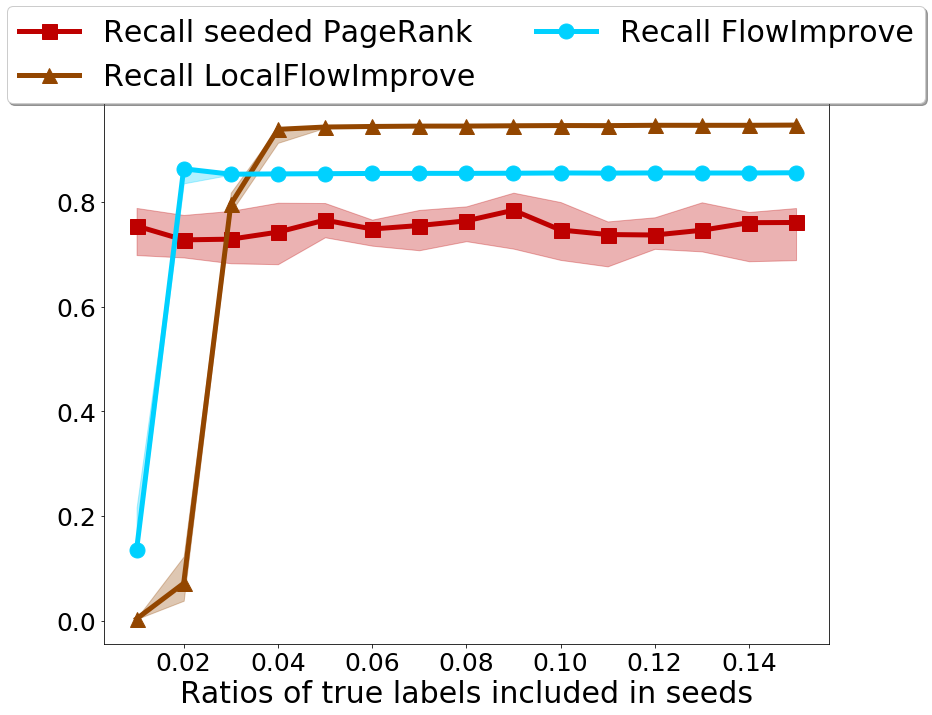

In [7]:
x = 0.01*np.array(range(1,16))
y1 = np.array([i[0] for i in records_mnist["l1reg_F1_all"]])
y2 = np.array([i[0] for i in records_mnist["flow_F1_all"]])
y3 = np.array([i[0] for i in records_mnist["flow_F1_all1"]])
y4 = np.array([i[0] for i in records_mnist["l1reg_PR_all"]])
y5 = np.array([i[0] for i in records_mnist["flow_PR_all"]])
y6 = np.array([i[0] for i in records_mnist["flow_PR_all1"]])
y7 = np.array([i[0] for i in records_mnist["l1reg_RC_all"]])
y8 = np.array([i[0] for i in records_mnist["flow_RC_all"]])
y9 = np.array([i[0] for i in records_mnist["flow_RC_all1"]])
per_20_1 = np.array([i[1] for i in records_mnist["l1reg_F1_all"]])
per_20_2 = np.array([i[1] for i in records_mnist["flow_F1_all"]])
per_20_3 = np.array([i[1] for i in records_mnist["flow_F1_all1"]])
per_20_4 = np.array([i[1] for i in records_mnist["l1reg_PR_all"]])
per_20_5 = np.array([i[1] for i in records_mnist["flow_PR_all"]])
per_20_6 = np.array([i[1] for i in records_mnist["flow_PR_all1"]])
per_20_7 = np.array([i[1] for i in records_mnist["l1reg_RC_all"]])
per_20_8 = np.array([i[1] for i in records_mnist["flow_RC_all"]])
per_20_9 = np.array([i[1] for i in records_mnist["flow_RC_all1"]])
per_80_1 = np.array([i[2] for i in records_mnist["l1reg_F1_all"]])
per_80_2 = np.array([i[2] for i in records_mnist["flow_F1_all"]])
per_80_3 = np.array([i[2] for i in records_mnist["flow_F1_all1"]])
per_80_4 = np.array([i[2] for i in records_mnist["l1reg_PR_all"]])
per_80_5 = np.array([i[2] for i in records_mnist["flow_PR_all"]])
per_80_6 = np.array([i[2] for i in records_mnist["flow_PR_all1"]])
per_80_7 = np.array([i[2] for i in records_mnist["l1reg_RC_all"]])
per_80_8 = np.array([i[2] for i in records_mnist["flow_RC_all"]])
per_80_9 = np.array([i[2] for i in records_mnist["flow_RC_all1"]])

# Plot results
f = plt.figure(figsize=(13, 10))

plt.plot(x, y1, 'k', color='#BE0000', marker="s",markersize=15,linewidth=5)
plt.fill_between(x, per_20_1, per_80_1,
    alpha=0.3, edgecolor='#BE0000', facecolor='#BE0000')
plt.plot(x, y2, 'k', color='#934600', marker="^",markersize=15,linewidth=5)
plt.fill_between(x, per_20_2, per_80_2,
    alpha=0.3, edgecolor='#934600', facecolor='#934600')
#plt.axvline(x=len(cls),linestyle='--',color='black',linewidth=4)
plt.plot(x, y3, 'k', color='#00D1FF', marker="o",markersize=15,linewidth=5)
plt.fill_between(x, per_20_3, per_80_3,
    alpha=0.3, edgecolor='#00D1FF', facecolor='#00D1FF')

plt.legend(['F1_score seeded PageRank', 'F1_score LocalFlowImprove', 'F1_score FlowImprove'], loc='upper center', fancybox=True, shadow=True ,
           bbox_to_anchor=(0.5, 1.2), ncol=2, fontsize=30)

plt.xlabel('Ratios of true labels included in seeds', fontsize=30)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

f.savefig("mnist_f1_sl_without_l1reg.pdf",format='pdf',bbox_inches='tight')

f = plt.figure(figsize=(13, 10))

plt.plot(x, y4, 'k', color='#BE0000', marker="s",markersize=15,linewidth=5)
plt.fill_between(x, per_20_4, per_80_4,
    alpha=0.3, edgecolor='#BE0000', facecolor='#BE0000')
plt.plot(x, y5, 'k', color='#934600', marker="^",markersize=15,linewidth=5)
plt.fill_between(x, per_20_5, per_80_5,
    alpha=0.3, edgecolor='#934600', facecolor='#934600')
#plt.axvline(x=len(cls),linestyle='--',color='black',linewidth=4)
plt.plot(x, y6, 'k', color='#00D1FF', marker="o",markersize=15,linewidth=5)
plt.fill_between(x, per_20_6, per_80_6,
    alpha=0.3, edgecolor='#00D1FF', facecolor='#00D1FF')
#plt.axvline(x=len(cls),linestyle='--',color='black',linewidth=4)

plt.legend(['Precision seeded PageRank', 'Precision LocalFlowImprove', 'Precision FlowImprove'], loc='upper center', fancybox=True, shadow=True ,
           bbox_to_anchor=(0.5, 1.2), ncol=2, fontsize=30)

plt.xlabel('Ratios of true labels included in seeds', fontsize=30)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

f.savefig("mnist_pr_sl_without_l1reg.pdf",format='pdf',bbox_inches='tight')

f = plt.figure(figsize=(13, 10))

plt.plot(x, y7, 'k', color='#BE0000', marker="s",markersize=15,linewidth=5)
plt.fill_between(x, per_20_7, per_80_7,
    alpha=0.3, edgecolor='#BE0000', facecolor='#BE0000')
plt.plot(x, y8, 'k', color='#934600', marker="^",markersize=15,linewidth=5)
plt.fill_between(x, per_20_8, per_80_8,
    alpha=0.3, edgecolor='#934600', facecolor='#934600')
#plt.axvline(x=len(cls),linestyle='--',color='black',linewidth=4)
plt.plot(x, y9, 'k', color='#00D1FF', marker="o",markersize=15,linewidth=5)
plt.fill_between(x, per_20_9, per_80_9,
    alpha=0.3, edgecolor='#00D1FF', facecolor='#00D1FF')
#plt.axvline(x=len(cls),linestyle='--',color='black',linewidth=4)

plt.legend(['Recall seeded PageRank', 'Recall LocalFlowImprove', 'Recall FlowImprove'], loc='upper center', fancybox=True, shadow=True ,
           bbox_to_anchor=(0.5, 1.2), ncol=2, fontsize=30)

plt.xlabel('Ratios of true labels included in seeds', fontsize=30)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

f.savefig("mnist_rc_sl_without_l1reg.pdf",format='pdf',bbox_inches='tight')

# SBM

In [34]:
p,q = 0.005,0.0005
ncls = 3
cls_size = 2000
npts = np.random.choice(range(cls_size,cls_size+1),ncls)
nnodes = np.sum(npts)
labels = np.zeros(nnodes,dtype="int32")
si = 0
for i in range(ncls):
    labels[si:(si+npts[i])] = i
    si += npts[i]

ei,ej = [],[]
np.random.seed(13170)
rands = np.random.rand(nnodes,nnodes)
for i in range(nnodes):
    if i % 100 == 0:
        print(i)
    for j in range(i+1,nnodes):
        if labels[i] == labels[j] and rands[i,j] < p:
            ei.append(i)
            ej.append(j)
        if labels[i] != labels[j] and rands[i,j] < q:
            ei.append(i)
            ej.append(j)
G = lgc.GraphLocal()
G.list_to_gl(ei,ej,[1.0]*len(ei))

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900


In [35]:
G.is_disconnected()

There are  1  connected components in the graph
The graph is not a disconnected graph.


False

In [36]:
clusters = defaultdict(list)

In [37]:
for i in range(len(labels)):
    clusters[labels[i]].append(i)

In [38]:
kwargs_list = [{"method":"l1reg-rand",
                "alpha":0.01,
                "rho":1.0e-5,
                "normalize":False,
                "normalized_objective":False,
                "epsilon":1.0e-8,
                "iterations":10000000,
                "cpp":True,
                "delta":0.1,
                "delta1":0,
                "ratio":ratio} for ratio in 0.01*np.array(range(1,16))]

In [39]:
records_SBM = semisupervised_learning(G,clusters,kwargs_list,nprocs=100,flowmethod="sl_weighted")

Finished 0/450 experiments.
Finished 10/450 experiments.
Finished 20/450 experiments.
Finished 30/450 experiments.
Finished 40/450 experiments.
Finished 50/450 experiments.
Finished 60/450 experiments.
Finished 70/450 experiments.
Finished 80/450 experiments.
Finished 90/450 experiments.
Finished 100/450 experiments.
Finished 110/450 experiments.
Finished 120/450 experiments.
Finished 130/450 experiments.
Finished 140/450 experiments.
Finished 150/450 experiments.
Finished 160/450 experiments.
Finished 170/450 experiments.
Finished 180/450 experiments.
Finished 190/450 experiments.
Finished 200/450 experiments.
Finished 210/450 experiments.
Finished 220/450 experiments.
Finished 230/450 experiments.
Finished 240/450 experiments.
Finished 250/450 experiments.
Finished 260/450 experiments.
Finished 270/450 experiments.
Finished 280/450 experiments.
Finished 290/450 experiments.
Finished 300/450 experiments.
Finished 310/450 experiments.
Finished 320/450 experiments.
Finished 330/450 expe

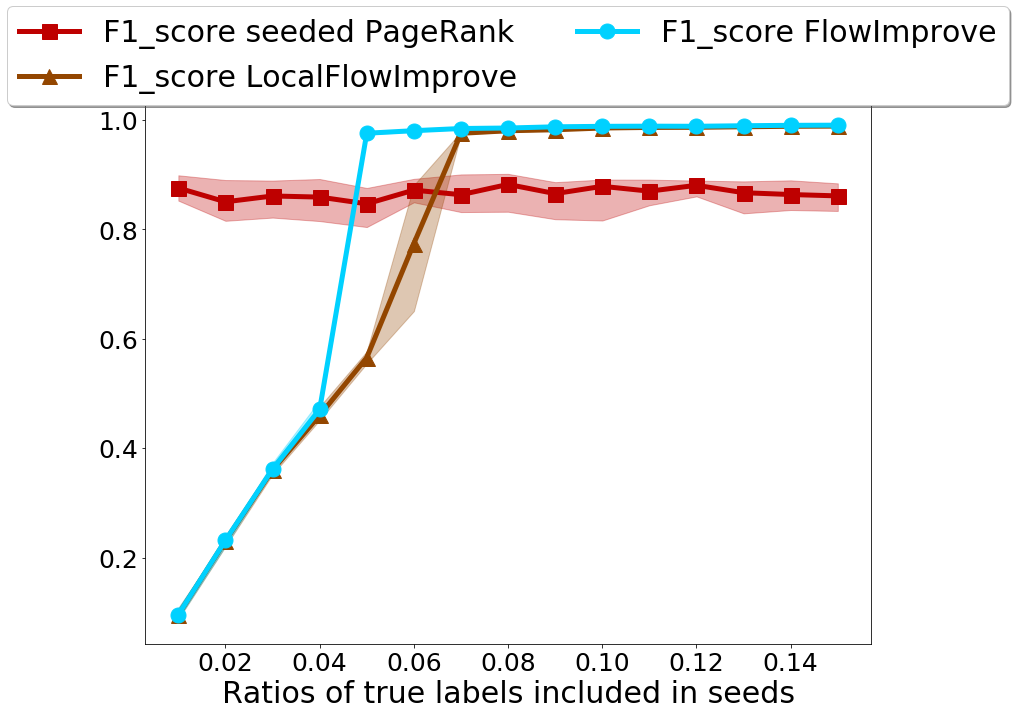

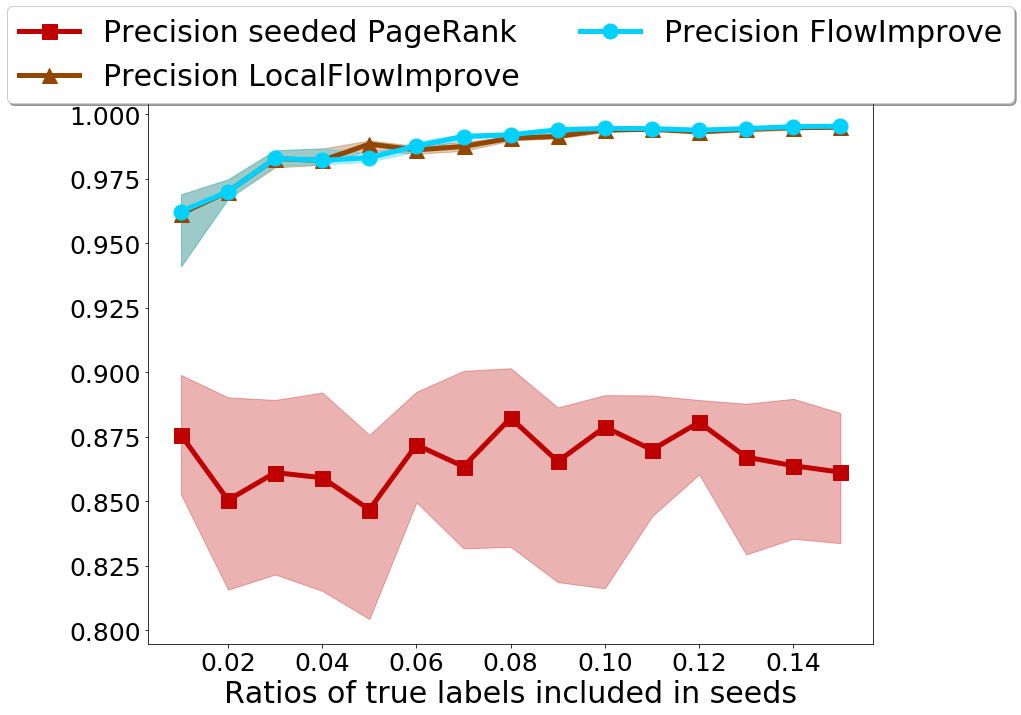

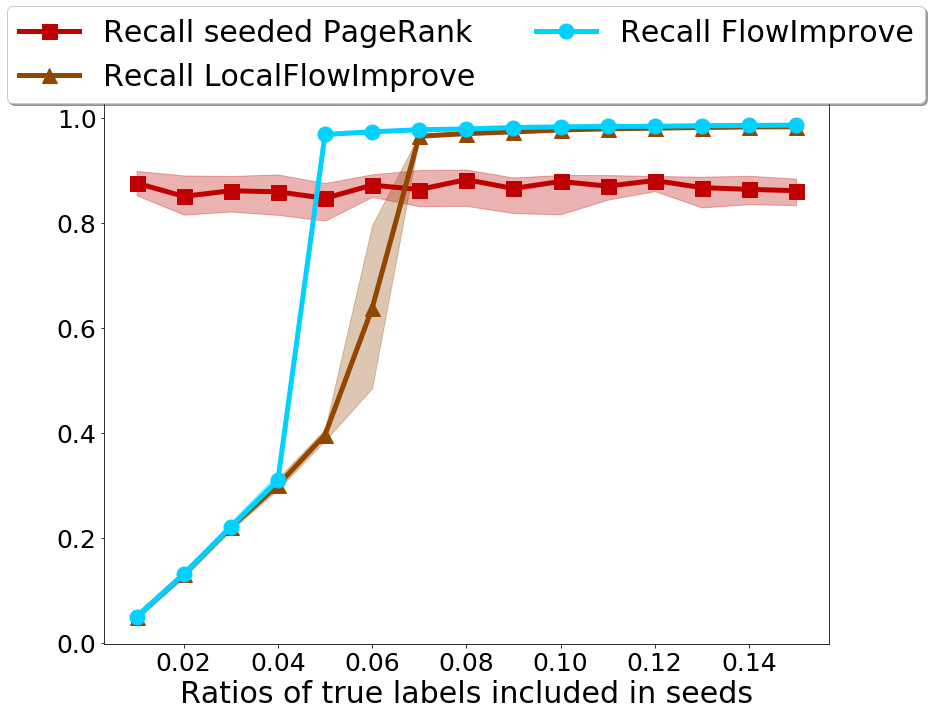

In [40]:
x = 0.01*np.array(range(1,16))
y1 = np.array([i[0] for i in records_SBM["l1reg_F1_all"]])
y2 = np.array([i[0] for i in records_SBM["flow_F1_all"]])
y3 = np.array([i[0] for i in records_SBM["flow_F1_all1"]])
y4 = np.array([i[0] for i in records_SBM["l1reg_PR_all"]])
y5 = np.array([i[0] for i in records_SBM["flow_PR_all"]])
y6 = np.array([i[0] for i in records_SBM["flow_PR_all1"]])
y7 = np.array([i[0] for i in records_SBM["l1reg_RC_all"]])
y8 = np.array([i[0] for i in records_SBM["flow_RC_all"]])
y9 = np.array([i[0] for i in records_SBM["flow_RC_all1"]])
per_20_1 = np.array([i[1] for i in records_SBM["l1reg_F1_all"]])
per_20_2 = np.array([i[1] for i in records_SBM["flow_F1_all"]])
per_20_3 = np.array([i[1] for i in records_SBM["flow_F1_all1"]])
per_20_4 = np.array([i[1] for i in records_SBM["l1reg_PR_all"]])
per_20_5 = np.array([i[1] for i in records_SBM["flow_PR_all"]])
per_20_6 = np.array([i[1] for i in records_SBM["flow_PR_all1"]])
per_20_7 = np.array([i[1] for i in records_SBM["l1reg_RC_all"]])
per_20_8 = np.array([i[1] for i in records_SBM["flow_RC_all"]])
per_20_9 = np.array([i[1] for i in records_SBM["flow_RC_all1"]])
per_80_1 = np.array([i[2] for i in records_SBM["l1reg_F1_all"]])
per_80_2 = np.array([i[2] for i in records_SBM["flow_F1_all"]])
per_80_3 = np.array([i[2] for i in records_SBM["flow_F1_all1"]])
per_80_4 = np.array([i[2] for i in records_SBM["l1reg_PR_all"]])
per_80_5 = np.array([i[2] for i in records_SBM["flow_PR_all"]])
per_80_6 = np.array([i[2] for i in records_SBM["flow_PR_all1"]])
per_80_7 = np.array([i[2] for i in records_SBM["l1reg_RC_all"]])
per_80_8 = np.array([i[2] for i in records_SBM["flow_RC_all"]])
per_80_9 = np.array([i[2] for i in records_SBM["flow_RC_all1"]])

# Plot results
f = plt.figure(figsize=(13, 10))

plt.plot(x, y1, 'k', color='#BE0000', marker="s",markersize=15,linewidth=5)
plt.fill_between(x, per_20_1, per_80_1,
    alpha=0.3, edgecolor='#BE0000', facecolor='#BE0000')
plt.plot(x, y2, 'k', color='#934600', marker="^",markersize=15,linewidth=5)
plt.fill_between(x, per_20_2, per_80_2,
    alpha=0.3, edgecolor='#934600', facecolor='#934600')
#plt.axvline(x=len(cls),linestyle='--',color='black',linewidth=4)
plt.plot(x, y3, 'k', color='#00D1FF', marker="o",markersize=15,linewidth=5)
plt.fill_between(x, per_20_3, per_80_3,
    alpha=0.3, edgecolor='#00D1FF', facecolor='#00D1FF')

plt.legend(['F1_score seeded PageRank', 'F1_score LocalFlowImprove', 'F1_score FlowImprove'], loc='upper center', fancybox=True, shadow=True ,
           bbox_to_anchor=(0.5, 1.2), ncol=2, fontsize=30)

plt.xlabel('Ratios of true labels included in seeds', fontsize=30)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

f.savefig("SBM_f1_sl_without_l1reg.pdf",format='pdf',bbox_inches='tight')

f = plt.figure(figsize=(13, 10))

plt.plot(x, y4, 'k', color='#BE0000', marker="s",markersize=15,linewidth=5)
plt.fill_between(x, per_20_4, per_80_4,
    alpha=0.3, edgecolor='#BE0000', facecolor='#BE0000')
plt.plot(x, y5, 'k', color='#934600', marker="^",markersize=15,linewidth=5)
plt.fill_between(x, per_20_5, per_80_5,
    alpha=0.3, edgecolor='#934600', facecolor='#934600')
#plt.axvline(x=len(cls),linestyle='--',color='black',linewidth=4)
plt.plot(x, y6, 'k', color='#00D1FF', marker="o",markersize=15,linewidth=5)
plt.fill_between(x, per_20_6, per_80_6,
    alpha=0.3, edgecolor='#00D1FF', facecolor='#00D1FF')
#plt.axvline(x=len(cls),linestyle='--',color='black',linewidth=4)

plt.legend(['Precision seeded PageRank', 'Precision LocalFlowImprove', 'Precision FlowImprove'], loc='upper center', fancybox=True, shadow=True ,
           bbox_to_anchor=(0.5, 1.2), ncol=2, fontsize=30)

plt.xlabel('Ratios of true labels included in seeds', fontsize=30)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

f.savefig("SBM_pr_sl_without_l1reg.pdf",format='pdf',bbox_inches='tight')

f = plt.figure(figsize=(13, 10))

plt.plot(x, y7, 'k', color='#BE0000', marker="s",markersize=15,linewidth=5)
plt.fill_between(x, per_20_7, per_80_7,
    alpha=0.3, edgecolor='#BE0000', facecolor='#BE0000')
plt.plot(x, y8, 'k', color='#934600', marker="^",markersize=15,linewidth=5)
plt.fill_between(x, per_20_8, per_80_8,
    alpha=0.3, edgecolor='#934600', facecolor='#934600')
#plt.axvline(x=len(cls),linestyle='--',color='black',linewidth=4)
plt.plot(x, y9, 'k', color='#00D1FF', marker="o",markersize=15,linewidth=5)
plt.fill_between(x, per_20_9, per_80_9,
    alpha=0.3, edgecolor='#00D1FF', facecolor='#00D1FF')
#plt.axvline(x=len(cls),linestyle='--',color='black',linewidth=4)

plt.legend(['Recall seeded PageRank', 'Recall LocalFlowImprove', 'Recall FlowImprove'], loc='upper center', fancybox=True, shadow=True ,
           bbox_to_anchor=(0.5, 1.2), ncol=2, fontsize=30)

plt.xlabel('Ratios of true labels included in seeds', fontsize=30)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

f.savefig("SBM_rc_sl_without_l1reg.pdf",format='pdf',bbox_inches='tight')

# PubMed

In [17]:
rptr = open("dataset/Pubmed-Diabetes/data/Pubmed-Diabetes.NODE.paper.tab","r")
lines = rptr.readlines()
rptr.close()

paper_ids = {}
node_ids = 0
clusters = defaultdict(list)
labels = {}
for i in range(2,len(lines)):
    line = lines[i]
    paper_ids[int(line.split("\t")[0])] = node_ids
    clusters[int(line.split("\t")[1].split("=")[-1])].append(node_ids)
    labels[node_ids] = int(line.split("\t")[1].split("=")[-1])
    node_ids += 1

rptr = open("dataset/Pubmed-Diabetes/data/Pubmed-Diabetes.DIRECTED.cites.tab","r")
lines = rptr.readlines()
rptr.close()    

ei,ej = [],[]
for i in range(2,len(lines)):
    tmp = lines[i].replace("paper:","").replace("\n","").split("\t")
    ei.append(paper_ids[int(tmp[1])])
    ej.append(paper_ids[int(tmp[3])])
    
g = lgc.GraphLocal()
g.list_to_gl(ei,ej,[1.0]*len(ei))
g.connected_components()
largest_component= set(np.nonzero(g.components == Counter(g.components).most_common()[0][0])[0])
g_copy = g.largest_component()
clusters_copy = defaultdict(list)
nnodes = 0
for i in range(g._num_vertices):
    if i in largest_component:
        if i in labels:
            clusters_copy[labels[i]].append(nnodes)
        nnodes += 1
print(nnodes)

There are  1  connected components in the graph
There are  1  connected components in the graph
19717


In [29]:
kwargs_list = [{"method":"l1reg-rand",
                "alpha":0.01,
                "rho":1.0e-8,
                "normalize":False,
                "normalized_objective":False,
                "epsilon":1.0e-8,
                "iterations":1000000,
                "cpp":True,
                "delta":0.1,
                "delta1":0,
                "ratio":ratio} for ratio in 0.005*np.array(range(1,16))]

In [30]:
records_Pub = semisupervised_learning(g_copy,clusters_copy,kwargs_list,nprocs=100,flowmethod="sl",use_bfs=True)

Finished 0/450 experiments.
Finished 10/450 experiments.
Finished 20/450 experiments.
Finished 30/450 experiments.
Finished 40/450 experiments.
Finished 50/450 experiments.
Finished 60/450 experiments.
Finished 70/450 experiments.
Finished 80/450 experiments.
Finished 90/450 experiments.
Finished 100/450 experiments.
Finished 110/450 experiments.
Finished 120/450 experiments.
Finished 130/450 experiments.
Finished 140/450 experiments.
Finished 150/450 experiments.
Finished 160/450 experiments.
Finished 170/450 experiments.
Finished 180/450 experiments.
Finished 190/450 experiments.
Finished 200/450 experiments.
Finished 210/450 experiments.
Finished 220/450 experiments.
Finished 230/450 experiments.
Finished 240/450 experiments.
Finished 250/450 experiments.
Finished 260/450 experiments.
Finished 270/450 experiments.
Finished 280/450 experiments.
Finished 290/450 experiments.
Finished 300/450 experiments.
Finished 310/450 experiments.
Finished 320/450 experiments.
Finished 330/450 expe

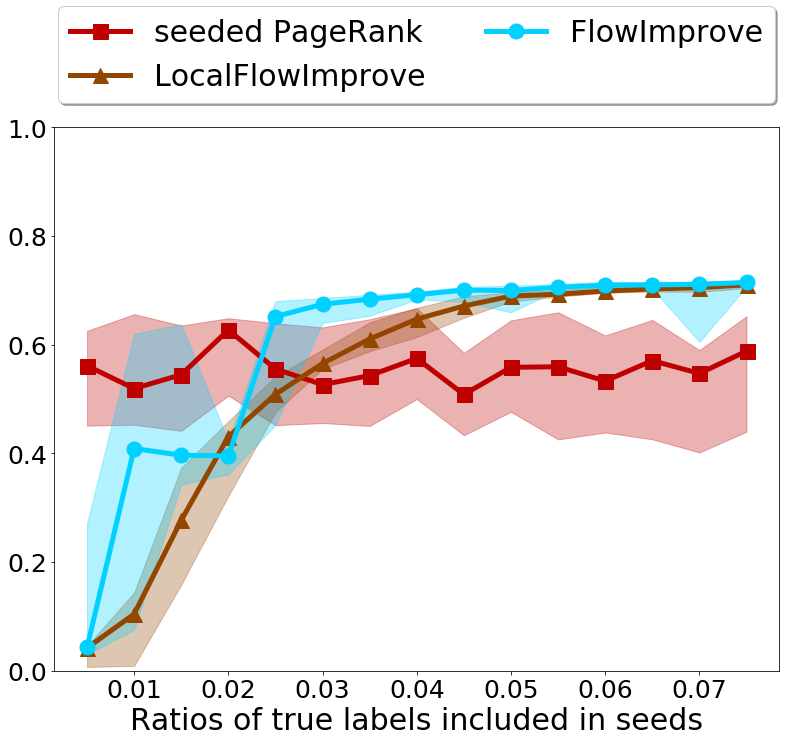

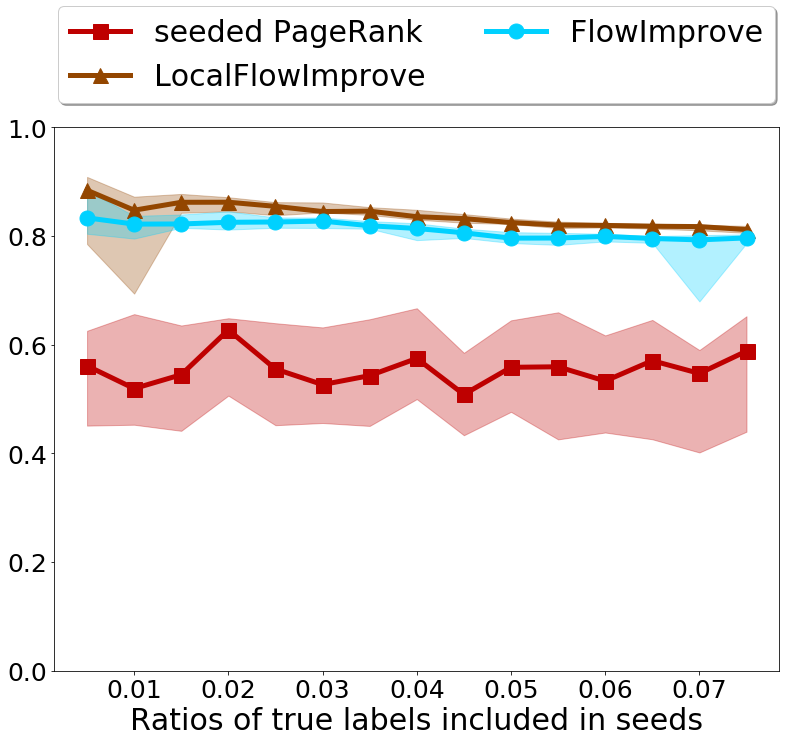

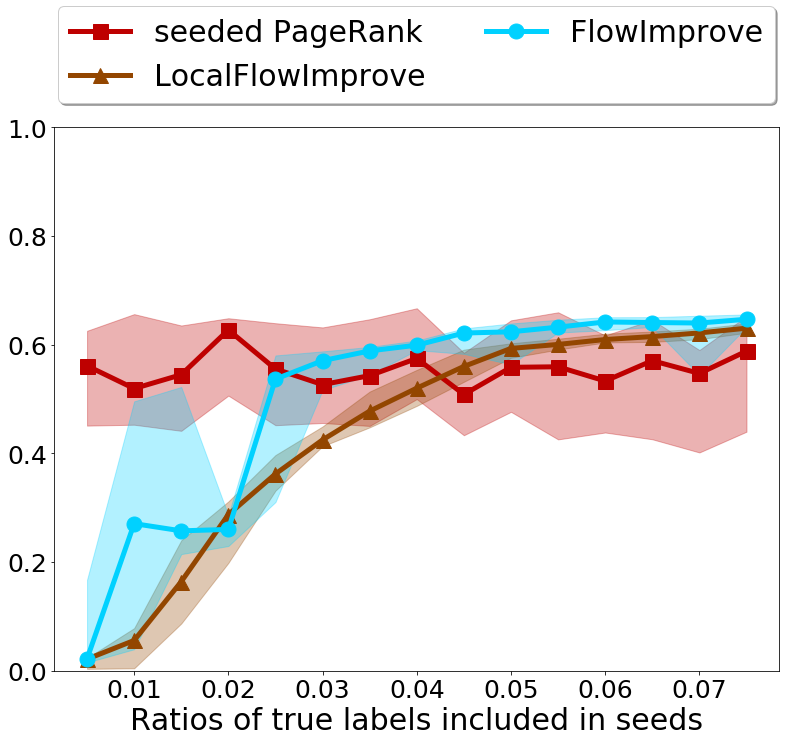

In [31]:
x = 0.005*np.array(range(1,16))
y1 = np.array([i[0] for i in records_Pub["l1reg_F1_all"]])
y2 = np.array([i[0] for i in records_Pub["flow_F1_all"]])
y3 = np.array([i[0] for i in records_Pub["flow_F1_all1"]])
y4 = np.array([i[0] for i in records_Pub["l1reg_PR_all"]])
y5 = np.array([i[0] for i in records_Pub["flow_PR_all"]])
y6 = np.array([i[0] for i in records_Pub["flow_PR_all1"]])
y7 = np.array([i[0] for i in records_Pub["l1reg_RC_all"]])
y8 = np.array([i[0] for i in records_Pub["flow_RC_all"]])
y9 = np.array([i[0] for i in records_Pub["flow_RC_all1"]])
per_20_1 = np.array([i[1] for i in records_Pub["l1reg_F1_all"]])
per_20_2 = np.array([i[1] for i in records_Pub["flow_F1_all"]])
per_20_3 = np.array([i[1] for i in records_Pub["flow_F1_all1"]])
per_20_4 = np.array([i[1] for i in records_Pub["l1reg_PR_all"]])
per_20_5 = np.array([i[1] for i in records_Pub["flow_PR_all"]])
per_20_6 = np.array([i[1] for i in records_Pub["flow_PR_all1"]])
per_20_7 = np.array([i[1] for i in records_Pub["l1reg_RC_all"]])
per_20_8 = np.array([i[1] for i in records_Pub["flow_RC_all"]])
per_20_9 = np.array([i[1] for i in records_Pub["flow_RC_all1"]])
per_80_1 = np.array([i[2] for i in records_Pub["l1reg_F1_all"]])
per_80_2 = np.array([i[2] for i in records_Pub["flow_F1_all"]])
per_80_3 = np.array([i[2] for i in records_Pub["flow_F1_all1"]])
per_80_4 = np.array([i[2] for i in records_Pub["l1reg_PR_all"]])
per_80_5 = np.array([i[2] for i in records_Pub["flow_PR_all"]])
per_80_6 = np.array([i[2] for i in records_Pub["flow_PR_all1"]])
per_80_7 = np.array([i[2] for i in records_Pub["l1reg_RC_all"]])
per_80_8 = np.array([i[2] for i in records_Pub["flow_RC_all"]])
per_80_9 = np.array([i[2] for i in records_Pub["flow_RC_all1"]])

# Plot results
f = plt.figure(figsize=(13, 10))

plt.plot(x, y1, 'k', color='#BE0000', marker="s",markersize=15,linewidth=5)
plt.fill_between(x, per_20_1, per_80_1,
    alpha=0.3, edgecolor='#BE0000', facecolor='#BE0000')
plt.plot(x, y2, 'k', color='#934600', marker="^",markersize=15,linewidth=5)
plt.fill_between(x, per_20_2, per_80_2,
    alpha=0.3, edgecolor='#934600', facecolor='#934600')
#plt.axvline(x=len(cls),linestyle='--',color='black',linewidth=4)
plt.plot(x, y3, 'k', color='#00D1FF', marker="o",markersize=15,linewidth=5)
plt.fill_between(x, per_20_3, per_80_3,
    alpha=0.3, edgecolor='#00D1FF', facecolor='#00D1FF')

plt.legend(['seeded PageRank', 'LocalFlowImprove', 'FlowImprove'], loc='upper center', fancybox=True, shadow=True ,
           bbox_to_anchor=(0.5, 1.25), ncol=2, fontsize=30)

plt.xlabel('Ratios of true labels included in seeds', fontsize=30)
plt.ylim(0,1)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

f.savefig("records_Pub_f1_sl_without_l1reg.pdf",format='pdf',bbox_inches='tight')

f = plt.figure(figsize=(13, 10))

plt.plot(x, y4, 'k', color='#BE0000', marker="s",markersize=15,linewidth=5)
plt.fill_between(x, per_20_4, per_80_4,
    alpha=0.3, edgecolor='#BE0000', facecolor='#BE0000')
plt.plot(x, y5, 'k', color='#934600', marker="^",markersize=15,linewidth=5)
plt.fill_between(x, per_20_5, per_80_5,
    alpha=0.3, edgecolor='#934600', facecolor='#934600')
#plt.axvline(x=len(cls),linestyle='--',color='black',linewidth=4)
plt.plot(x, y6, 'k', color='#00D1FF', marker="o",markersize=15,linewidth=5)
plt.fill_between(x, per_20_6, per_80_6,
    alpha=0.3, edgecolor='#00D1FF', facecolor='#00D1FF')
#plt.axvline(x=len(cls),linestyle='--',color='black',linewidth=4)

plt.legend(['seeded PageRank', 'LocalFlowImprove', 'FlowImprove'], loc='upper center', fancybox=True, shadow=True ,
           bbox_to_anchor=(0.5, 1.25), ncol=2, fontsize=30)

plt.xlabel('Ratios of true labels included in seeds', fontsize=30)
plt.ylim(0,1)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

f.savefig("Pubmed_pr_sl_without_l1reg.pdf",format='pdf',bbox_inches='tight')

f = plt.figure(figsize=(13, 10))

plt.plot(x, y7, 'k', color='#BE0000', marker="s",markersize=15,linewidth=5)
plt.fill_between(x, per_20_7, per_80_7,
    alpha=0.3, edgecolor='#BE0000', facecolor='#BE0000')
plt.plot(x, y8, 'k', color='#934600', marker="^",markersize=15,linewidth=5)
plt.fill_between(x, per_20_8, per_80_8,
    alpha=0.3, edgecolor='#934600', facecolor='#934600')
#plt.axvline(x=len(cls),linestyle='--',color='black',linewidth=4)
plt.plot(x, y9, 'k', color='#00D1FF', marker="o",markersize=15,linewidth=5)
plt.fill_between(x, per_20_9, per_80_9,
    alpha=0.3, edgecolor='#00D1FF', facecolor='#00D1FF')
#plt.axvline(x=len(cls),linestyle='--',color='black',linewidth=4)

plt.legend(['seeded PageRank', 'LocalFlowImprove', 'FlowImprove'], loc='upper center', fancybox=True, shadow=True ,
           bbox_to_anchor=(0.5, 1.25), ncol=2, fontsize=30)

plt.xlabel('Ratios of true labels included in seeds', fontsize=30)
plt.ylim(0,1)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

f.savefig("Pubmed_rc_sl_without_l1reg.pdf",format='pdf',bbox_inches='tight')

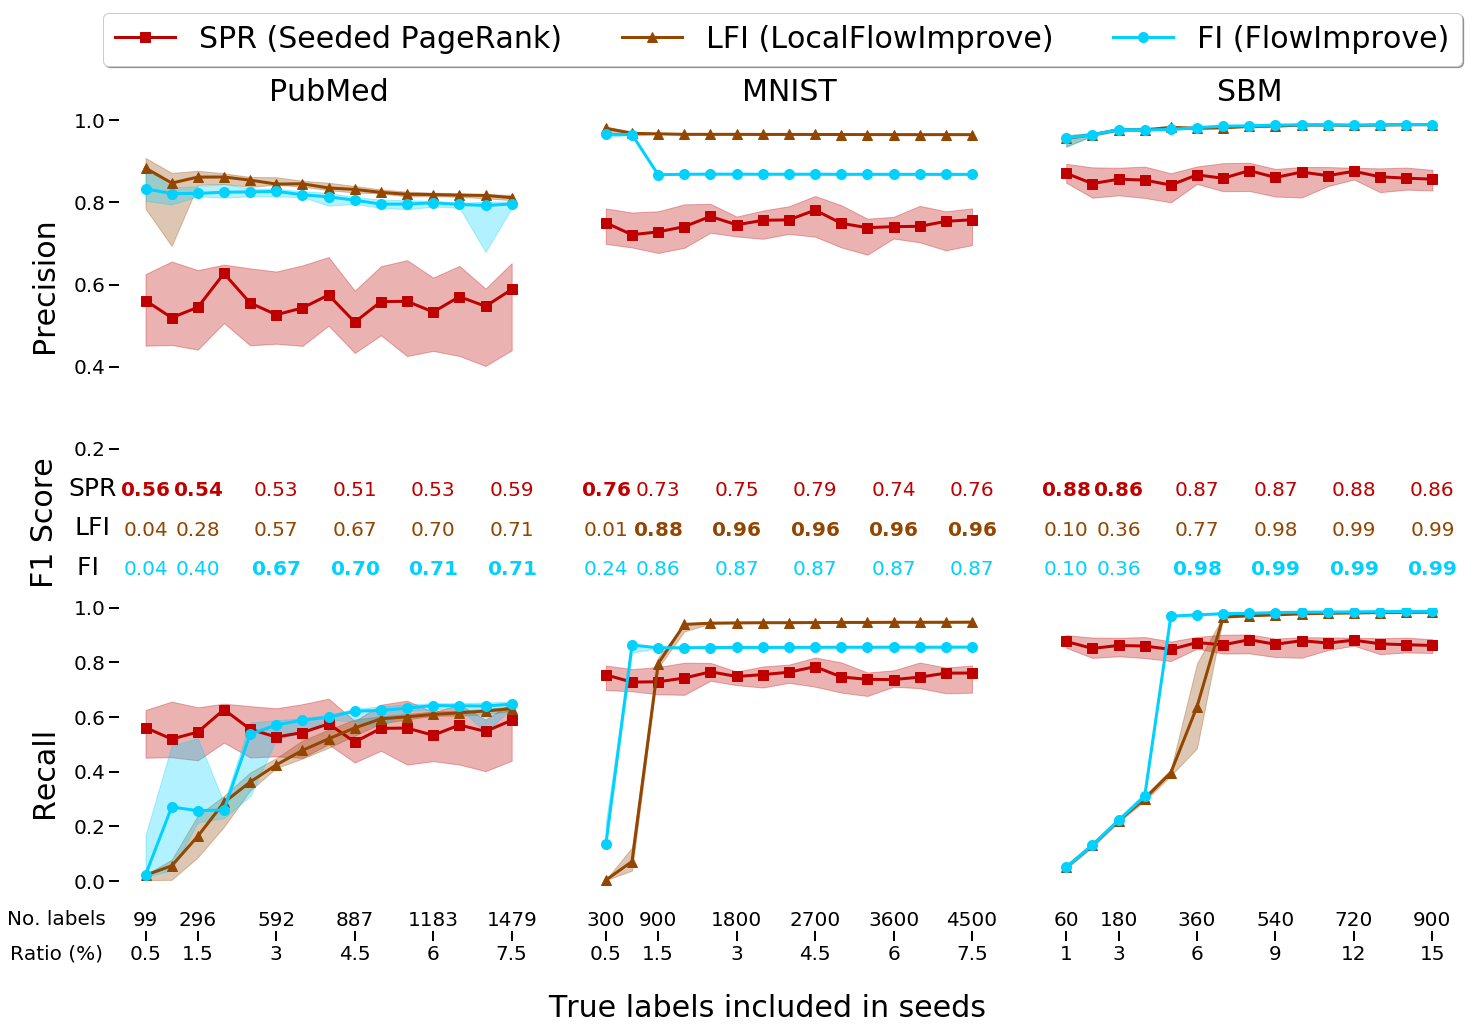

In [66]:
from matplotlib.lines import Line2D

bg_color = [0.9176470588235294, 0.9176470588235294, 0.9490196078431372, 1.0]

f,axes = plt.subplots(5, 3, figsize=(24,15), gridspec_kw={"wspace":0.1,"hspace":0.3,"height_ratios":[1,0.001,0.001,0.001,1]})

x = 0.01*np.array(range(1,16))


y1 = np.array([i[0] for i in records_Pub["l1reg_PR_all"]])
y2 = np.array([i[0] for i in records_Pub["flow_PR_all"]])
y3 = np.array([i[0] for i in records_Pub["flow_PR_all1"]])
y4 = np.array([i[0] for i in records_Pub["l1reg_RC_all"]])
y5 = np.array([i[0] for i in records_Pub["flow_RC_all"]])
y6 = np.array([i[0] for i in records_Pub["flow_RC_all1"]])

per_20_1 = np.array([i[1] for i in records_Pub["l1reg_PR_all"]])
per_20_2 = np.array([i[1] for i in records_Pub["flow_PR_all"]])
per_20_3 = np.array([i[1] for i in records_Pub["flow_PR_all1"]])
per_20_4 = np.array([i[1] for i in records_Pub["l1reg_RC_all"]])
per_20_5 = np.array([i[1] for i in records_Pub["flow_RC_all"]])
per_20_6 = np.array([i[1] for i in records_Pub["flow_RC_all1"]])
per_80_1 = np.array([i[2] for i in records_Pub["l1reg_PR_all"]])
per_80_2 = np.array([i[2] for i in records_Pub["flow_PR_all"]])
per_80_3 = np.array([i[2] for i in records_Pub["flow_PR_all1"]])
per_80_4 = np.array([i[2] for i in records_Pub["l1reg_RC_all"]])
per_80_5 = np.array([i[2] for i in records_Pub["flow_RC_all"]])
per_80_6 = np.array([i[2] for i in records_Pub["flow_RC_all1"]])

l1=axes[0,0].plot(x, y1, 'k', color='#BE0000', marker="s",markersize=10,linewidth=3,label="SPR (Seeded PageRank)")
axes[0,0].fill_between(x, per_20_1, per_80_1,
    alpha=0.3, edgecolor='#BE0000', facecolor='#BE0000')
l2=axes[0,0].plot(x, y2, 'k', color='#934600', marker="^",markersize=10,linewidth=3,label="LFI (LocalFlowImprove)")
axes[0,0].fill_between(x, per_20_2, per_80_2,
    alpha=0.3, edgecolor='#934600', facecolor='#934600')
#plt.axvline(x=len(cls),linestyle='--',color='black',linewidth=4)
l3=axes[0,0].plot(x, y3, 'k', color='#00D1FF', marker="o",markersize=10,linewidth=3,label="FI (FlowImprove)")
axes[0,0].fill_between(x, per_20_3, per_80_3,
    alpha=0.3, edgecolor='#00D1FF', facecolor='#00D1FF')

axes[0,0].tick_params(which='both', # Options for both major and minor ticks
                top='off', # turn off top ticks
                right='off')  # turn off right ticks

axes[0,0].spines['top'].set_visible(False)
axes[0,0].spines['right'].set_visible(False)
axes[0,0].spines['bottom'].set_visible(False)
axes[0,0].spines['left'].set_visible(False)
axes[0,0].set_ylabel("Precision",fontsize=30,labelpad=15)
axes[0,0].set_xticks([0.01,0.03,0.06,0.09,0.12,0.15])
axes[0,0].set_yticks([0.2,0.4,0.6,0.8,1.0])
axes[0,0].set_xticklabels([],fontsize=20)
axes[0,0].set_yticklabels(["0.2","0.4","0.6","0.8","1.0"],fontsize=20)
axes[0,0].tick_params(axis='x', which='both', length=0)
axes[0,0].tick_params(axis='y', which='both', length=10, width=2)
#axes[0,0].set_facecolor(bg_color)
#axes[0,0].grid(color="grey")
axes[0,0].set_axisbelow(True)
axes[0,0].set_xlim(0,0.16)

axes[4,0].plot(x, y4, 'k', color='#BE0000', marker="s",markersize=10,linewidth=3)
axes[4,0].fill_between(x, per_20_4, per_80_4,
    alpha=0.3, edgecolor='#BE0000', facecolor='#BE0000')
axes[4,0].plot(x, y5, 'k', color='#934600', marker="^",markersize=10,linewidth=3)
axes[4,0].fill_between(x, per_20_5, per_80_5,
    alpha=0.3, edgecolor='#934600', facecolor='#934600')
#plt.axvline(x=len(cls),linestyle='--',color='black',linewidth=4)
axes[4,0].plot(x, y6, 'k', color='#00D1FF', marker="o",markersize=10,linewidth=3)
axes[4,0].fill_between(x, per_20_6, per_80_6,
    alpha=0.3, edgecolor='#00D1FF', facecolor='#00D1FF')

axes[4,0].tick_params(which='both', # Options for both major and minor ticks
                top='off', # turn off top ticks
                right='off')  # turn off right ticks

axes[4,0].spines['top'].set_visible(False)
axes[4,0].spines['right'].set_visible(False)
axes[4,0].spines['left'].set_visible(False)
axes[4,0].spines['bottom'].set_visible(False)
axes[4,0].set_ylabel("Recall",fontsize=30,labelpad=15)
axes[4,0].set_xticks([0.01,0.03,0.06,0.09,0.12,0.15])
axes[4,0].set_xticklabels(["0.5","1.5","3","4.5","6","7.5"],fontsize=20)
axes[4,0].set_yticks([0,0.2,0.4,0.6,0.8,1.0])
axes[4,0].set_yticklabels(["0.0","0.2","0.4","0.6","0.8","1.0"],fontsize=20)
axes[4,0].tick_params(axis='y', which='both', length=10, width=2)
axes[4,0].tick_params(axis='x', which='both', length=5, width=2)
#axes[1,0].set_facecolor(bg_color)
#axes[1,0].grid(color="grey")
axes[4,0].set_axisbelow(True)
axes[4,0].set_xlim(0,0.16)
axes[4,0].set_ylim(-0.2,1.0)

extra_ax = axes[4,0].twiny()
extra_ax.spines['top'].set_visible(False)
extra_ax.spines['right'].set_visible(False)
extra_ax.spines['left'].set_visible(False)
extra_ax.spines["bottom"].set_visible(False)
extra_ax.xaxis.set_ticks_position("bottom")
extra_ax.xaxis.set_label_position("bottom")
extra_ax.set_xticks([0.01,0.03,0.06,0.09,0.12,0.15])
extra_ax.set_xticklabels(["99","296","592","887","1183","1479"],fontsize=20)
extra_ax.tick_params(axis='x', which='both', length=5, width=2, direction="in",pad=-25)
extra_ax.set_xlim(0,0.16)


y1 = np.array([i[0] for i in records_mnist["l1reg_PR_all"]])
y2 = np.array([i[0] for i in records_mnist["flow_PR_all"]])
y3 = np.array([i[0] for i in records_mnist["flow_PR_all1"]])
y4 = np.array([i[0] for i in records_mnist["l1reg_RC_all"]])
y5 = np.array([i[0] for i in records_mnist["flow_RC_all"]])
y6 = np.array([i[0] for i in records_mnist["flow_RC_all1"]])

per_20_1 = np.array([i[1] for i in records_mnist["l1reg_PR_all"]])
per_20_2 = np.array([i[1] for i in records_mnist["flow_PR_all"]])
per_20_3 = np.array([i[1] for i in records_mnist["flow_PR_all1"]])
per_20_4 = np.array([i[1] for i in records_mnist["l1reg_RC_all"]])
per_20_5 = np.array([i[1] for i in records_mnist["flow_RC_all"]])
per_20_6 = np.array([i[1] for i in records_mnist["flow_RC_all1"]])
per_80_1 = np.array([i[2] for i in records_mnist["l1reg_PR_all"]])
per_80_2 = np.array([i[2] for i in records_mnist["flow_PR_all"]])
per_80_3 = np.array([i[2] for i in records_mnist["flow_PR_all1"]])
per_80_4 = np.array([i[2] for i in records_mnist["l1reg_RC_all"]])
per_80_5 = np.array([i[2] for i in records_mnist["flow_RC_all"]])
per_80_6 = np.array([i[2] for i in records_mnist["flow_RC_all1"]])

axes[0,1].plot(x, y1, 'k', color='#BE0000', marker="s",markersize=10,linewidth=3)
axes[0,1].fill_between(x, per_20_1, per_80_1,
    alpha=0.3, edgecolor='#BE0000', facecolor='#BE0000')
axes[0,1].plot(x, y2, 'k', color='#934600', marker="^",markersize=10,linewidth=3)
axes[0,1].fill_between(x, per_20_2, per_80_2,
    alpha=0.3, edgecolor='#934600', facecolor='#934600')
#plt.axvline(x=len(cls),linestyle='--',color='black',linewidth=4)
axes[0,1].plot(x, y3, 'k', color='#00D1FF', marker="o",markersize=10,linewidth=3)
axes[0,1].fill_between(x, per_20_3, per_80_3,
    alpha=0.3, edgecolor='#00D1FF', facecolor='#00D1FF')

axes[0,1].tick_params(which='both', # Options for both major and minor ticks
                top='off', # turn off top ticks
                right='off')  # turn off right ticks

axes[0,1].set_xticks([0.01,0.03,0.06,0.09,0.12,0.15])
axes[0,1].set_xticklabels([],fontsize=15)
axes[0,1].yaxis.set_ticklabels([])
axes[0,1].tick_params(axis='both', which='both', length=0)
axes[0,1].spines['top'].set_visible(False)
axes[0,1].spines['right'].set_visible(False)
axes[0,1].spines['left'].set_visible(False)
axes[0,1].spines['bottom'].set_visible(False)
axes[0,1].set_yticks([0.2,0.4,0.6,0.8,1.0])
#axes[0,1].set_facecolor(bg_color)
#axes[0,1].grid(color="grey")
axes[0,1].set_axisbelow(True)
axes[0,1].set_xlim(0,0.16)

selected_ids = [0,2,5,8,11,14]

F1_labels_all = []

F1_scores = np.array([records_Pub["l1reg_F1_all"][:,0].tolist(),
          records_Pub["flow_F1_all"][:,0].tolist(),
          records_Pub["flow_F1_all1"][:,0].tolist()])
F1_labels = []
for i in range(3):
    F1_labels.append([])
    for j in range(len(F1_scores[0])):
        if F1_scores[i][j] == np.max(F1_scores[:,j]):
            F1_labels[i].append(r"$\bf{:.{}f}$".format(F1_scores[i][j],2))
        else:
            F1_labels[i].append("{:.{}f}".format(F1_scores[i][j],2))
F1_labels_all.append(F1_labels.copy())
        
F1_scores = np.array([records_mnist["l1reg_F1_all"][:,0].tolist(),
          records_mnist["flow_F1_all"][:,0].tolist(),
          records_mnist["flow_F1_all1"][:,0].tolist()])
F1_labels = []
for i in range(3):
    F1_labels.append([])
    for j in range(len(F1_scores[0])):
        if F1_scores[i][j] == np.max(F1_scores[:,j]):
            F1_labels[i].append(r"$\bf{:.{}f}$".format(F1_scores[i][j],2))
        else:
            F1_labels[i].append("{:.{}f}".format(F1_scores[i][j],2))
F1_labels_all.append(F1_labels.copy())
        
F1_scores = np.array([records_SBM["l1reg_F1_all"][:,0].tolist(),
          records_SBM["flow_F1_all"][:,0].tolist(),
          records_SBM["flow_F1_all1"][:,0].tolist()])
F1_labels = []
for i in range(3):
    F1_labels.append([])
    for j in range(len(F1_scores[0])):
        if F1_scores[i][j] == np.max(F1_scores[:,j]):
            F1_labels[i].append(r"$\bf{:.{}f}$".format(F1_scores[i][j],2))
        else:
            F1_labels[i].append("{:.{}f}".format(F1_scores[i][j],2))
F1_labels_all.append(F1_labels.copy())

F1_labels_all = np.array(F1_labels_all)

axes[1,0].set_ylabel("SPR",fontsize=25,rotation="horizontal",va="center",labelpad=20)
axes[1,0].set_yticklabels([],fontsize=20)
axes[1,0].spines['top'].set_visible(False)
axes[1,0].spines['right'].set_visible(False)
axes[1,0].spines['left'].set_visible(False)
axes[1,0].spines['bottom'].set_visible(False)
axes[1,0].tick_params(which='both', # Options for both major and minor ticks
                left='off', # turn off top ticks
                bottom='off')  # turn off right ticks
axes[1,0].set_xticks([0.01,0.03,0.06,0.09,0.12,0.15])
axes[1,0].set_xticklabels(F1_labels_all[0,0,selected_ids],
                          fontsize=20,fontdict={'verticalalignment':'baseline'},
                          color="#BE0000")
axes[1,0].set_xlim(0,0.16)

axes[1,1].set_yticklabels([],fontsize=20)
axes[1,1].spines['top'].set_visible(False)
axes[1,1].spines['right'].set_visible(False)
axes[1,1].spines['left'].set_visible(False)
axes[1,1].spines['bottom'].set_visible(False)
axes[1,1].tick_params(which='both', # Options for both major and minor ticks
                left='off', # turn off top ticks
                bottom='off')  # turn off right ticks
axes[1,1].set_xticks([0.01,0.03,0.06,0.09,0.12,0.15])
axes[1,1].set_xticklabels(F1_labels_all[1,0,selected_ids],
                          fontsize=20,fontdict={'verticalalignment':'baseline'},
                          color="#BE0000")
axes[1,1].set_xlim(0,0.16)

axes[1,2].set_yticklabels([],fontsize=20)
axes[1,2].spines['top'].set_visible(False)
axes[1,2].spines['right'].set_visible(False)
axes[1,2].spines['left'].set_visible(False)
axes[1,2].spines['bottom'].set_visible(False)
axes[1,2].tick_params(which='both', # Options for both major and minor ticks
                left='off', # turn off top ticks
                bottom='off')  # turn off right ticks
axes[1,2].set_xticks([0.01,0.03,0.06,0.09,0.12,0.15])
axes[1,2].set_xticklabels(F1_labels_all[2,0,selected_ids],
                          fontsize=20,fontdict={'verticalalignment':'baseline'},
                          color="#BE0000")
axes[1,2].set_xlim(0,0.16)

axes[2,0].set_ylabel("LFI",fontsize=25,rotation="horizontal",va="center",labelpad=20)
axes[2,0].set_xticklabels([],fontsize=20)
axes[2,0].set_yticklabels([],fontsize=20)
axes[2,0].spines['top'].set_visible(False)
axes[2,0].spines['right'].set_visible(False)
axes[2,0].spines['left'].set_visible(False)
axes[2,0].spines['bottom'].set_visible(False)
axes[2,0].tick_params(which='both', # Options for both major and minor ticks
                left='off', # turn off top ticks
                bottom='off')  # turn off right ticks
axes[2,0].set_title("F1 Score",fontsize=30,x=-0.18,y=0.2,rotation=90,va="center")
axes[2,0].set_xticks([0.01,0.03,0.06,0.09,0.12,0.15])
axes[2,0].set_xticklabels(F1_labels_all[0,1,selected_ids],
                          fontsize=20,fontdict={'verticalalignment':'baseline'},
                          color="#934600")
axes[2,0].set_xlim(0,0.16)



axes[2,1].set_xticklabels([],fontsize=20)
axes[2,1].set_yticklabels([],fontsize=20)
axes[2,1].spines['top'].set_visible(False)
axes[2,1].spines['right'].set_visible(False)
axes[2,1].spines['left'].set_visible(False)
axes[2,1].spines['bottom'].set_visible(False)
axes[2,1].tick_params(which='both', # Options for both major and minor ticks
                left='off', # turn off top ticks
                bottom='off')  # turn off right ticks
axes[2,1].set_xticks([0.01,0.03,0.06,0.09,0.12,0.15])
axes[2,1].set_xticklabels(F1_labels_all[1,1,selected_ids],
                          fontsize=20,fontdict={'verticalalignment':'baseline'},
                          color="#934600")
axes[2,1].set_xlim(0,0.16)


axes[2,2].set_xticklabels([],fontsize=20)
axes[2,2].set_yticklabels([],fontsize=20)
axes[2,2].spines['top'].set_visible(False)
axes[2,2].spines['right'].set_visible(False)
axes[2,2].spines['left'].set_visible(False)
axes[2,2].spines['bottom'].set_visible(False)
axes[2,2].tick_params(which='both', # Options for both major and minor ticks
                left='off', # turn off top ticks
                bottom='off')  # turn off right ticks
axes[2,2].set_xticks([0.01,0.03,0.06,0.09,0.12,0.15])
axes[2,2].set_xticklabels(F1_labels_all[2,1,selected_ids],
                          fontsize=20,fontdict={'verticalalignment':'baseline'},
                          color="#934600")
axes[2,2].set_xlim(0,0.16)


axes[3,0].set_ylabel("FI ",fontsize=25,rotation="horizontal",va="center",labelpad=20)
axes[3,0].set_xticklabels([],fontsize=20)
axes[3,0].set_yticklabels([],fontsize=20)
axes[3,0].spines['top'].set_visible(False)
axes[3,0].spines['right'].set_visible(False)
axes[3,0].spines['left'].set_visible(False)
axes[3,0].spines['bottom'].set_visible(False)
axes[3,0].tick_params(which='both', # Options for both major and minor ticks
                left='off', # turn off top ticks
                bottom='off')  # turn off right ticks
axes[3,0].set_xticks([0.01,0.03,0.06,0.09,0.12,0.15])
axes[3,0].set_xticklabels(F1_labels_all[0,2,selected_ids],
                          fontsize=20,fontdict={'verticalalignment':'baseline'},
                          color="#00D1FF")
axes[3,0].set_xlim(0,0.16)



axes[3,1].set_xticklabels([],fontsize=20)
axes[3,1].set_yticklabels([],fontsize=20)
axes[3,1].spines['top'].set_visible(False)
axes[3,1].spines['right'].set_visible(False)
axes[3,1].spines['left'].set_visible(False)
axes[3,1].spines['bottom'].set_visible(False)
axes[3,1].tick_params(which='both', # Options for both major and minor ticks
                left='off', # turn off top ticks
                bottom='off')  # turn off right ticks
axes[3,1].set_xticks([0.01,0.03,0.06,0.09,0.12,0.15])
axes[3,1].set_xticklabels(F1_labels_all[1,2,selected_ids],
                          fontsize=20,fontdict={'verticalalignment':'baseline'},
                          color="#00D1FF")
axes[3,1].set_xlim(0,0.16)

axes[3,2].set_xticklabels([],fontsize=20)
axes[3,2].set_yticklabels([],fontsize=20)
axes[3,2].spines['top'].set_visible(False)
axes[3,2].spines['right'].set_visible(False)
axes[3,2].spines['left'].set_visible(False)
axes[3,2].spines['bottom'].set_visible(False)
axes[3,2].tick_params(which='both', # Options for both major and minor ticks
                left='off', # turn off top ticks
                bottom='off')  # turn off right ticks
axes[3,2].set_xticks([0.01,0.03,0.06,0.09,0.12,0.15])
axes[3,2].set_xticklabels(F1_labels_all[2,2,selected_ids],
                          fontsize=20,fontdict={'verticalalignment':'baseline'},
                          color="#00D1FF")
axes[3,2].set_xlim(0,0.16)

axes[4,1].plot(x, y4, 'k', color='#BE0000', marker="s",markersize=10,linewidth=3)
axes[4,1].fill_between(x, per_20_4, per_80_4,
    alpha=0.3, edgecolor='#BE0000', facecolor='#BE0000')
axes[4,1].plot(x, y5, 'k', color='#934600', marker="^",markersize=10,linewidth=3)
axes[4,1].fill_between(x, per_20_5, per_80_5,
    alpha=0.3, edgecolor='#934600', facecolor='#934600')
#plt.axvline(x=len(cls),linestyle='--',color='black',linewidth=4)
axes[4,1].plot(x, y6, 'k', color='#00D1FF', marker="o",markersize=10,linewidth=3)
axes[4,1].fill_between(x, per_20_6, per_80_6,
    alpha=0.3, edgecolor='#00D1FF', facecolor='#00D1FF')

axes[4,1].tick_params(which='both', # Options for both major and minor ticks
                top='off', # turn off top ticks
                right='off')  # turn off right ticks

axes[4,1].yaxis.set_ticklabels([])
axes[4,1].tick_params(axis='y', which='both', length=0)
axes[4,1].spines['top'].set_visible(False)
axes[4,1].spines['right'].set_visible(False)
axes[4,1].spines['left'].set_visible(False)
axes[4,1].spines['bottom'].set_visible(False)
axes[4,1].set_xticks([0.01,0.03,0.06,0.09,0.12,0.15])
axes[4,1].set_xticklabels(["0.5","1.5","3","4.5","6","7.5"],fontsize=20)
#axes[1,1].set_facecolor(bg_color)
#axes[1,1].grid(color="grey")
axes[4,1].tick_params(axis='x', which='both', length=5, width=2)
axes[4,1].set_axisbelow(True)
axes[4,1].set_xlim(0,0.16)
axes[4,1].set_ylim(-0.2,1.0)

extra_ax = axes[4,1].twiny()
extra_ax.spines['top'].set_visible(False)
extra_ax.spines['right'].set_visible(False)
extra_ax.spines['left'].set_visible(False)
extra_ax.spines["bottom"].set_visible(False)
extra_ax.xaxis.set_ticks_position("bottom")
extra_ax.xaxis.set_label_position("bottom")
extra_ax.set_xticks([0.01,0.03,0.06,0.09,0.12,0.15])
extra_ax.set_xticklabels(["300","900","1800","2700","3600","4500"],fontsize=20)
extra_ax.tick_params(axis='x', which='both', length=5, width=2, direction="in",pad=-25)
extra_ax.set_xlim(0,0.16)


y1 = np.array([i[0] for i in records_SBM["l1reg_PR_all"]])
y2 = np.array([i[0] for i in records_SBM["flow_PR_all"]])
y3 = np.array([i[0] for i in records_SBM["flow_PR_all1"]])
y4 = np.array([i[0] for i in records_SBM["l1reg_RC_all"]])
y5 = np.array([i[0] for i in records_SBM["flow_RC_all"]])
y6 = np.array([i[0] for i in records_SBM["flow_RC_all1"]])

per_20_1 = np.array([i[1] for i in records_SBM["l1reg_PR_all"]])
per_20_2 = np.array([i[1] for i in records_SBM["flow_PR_all"]])
per_20_3 = np.array([i[1] for i in records_SBM["flow_PR_all1"]])
per_20_4 = np.array([i[1] for i in records_SBM["l1reg_RC_all"]])
per_20_5 = np.array([i[1] for i in records_SBM["flow_RC_all"]])
per_20_6 = np.array([i[1] for i in records_SBM["flow_RC_all1"]])
per_80_1 = np.array([i[2] for i in records_SBM["l1reg_PR_all"]])
per_80_2 = np.array([i[2] for i in records_SBM["flow_PR_all"]])
per_80_3 = np.array([i[2] for i in records_SBM["flow_PR_all1"]])
per_80_4 = np.array([i[2] for i in records_SBM["l1reg_RC_all"]])
per_80_5 = np.array([i[2] for i in records_SBM["flow_RC_all"]])
per_80_6 = np.array([i[2] for i in records_SBM["flow_RC_all1"]])

axes[0,2].plot(x, y1, 'k', color='#BE0000', marker="s",markersize=10,linewidth=3)
axes[0,2].fill_between(x, per_20_1, per_80_1,
    alpha=0.3, edgecolor='#BE0000', facecolor='#BE0000')
axes[0,2].plot(x, y2, 'k', color='#934600', marker="^",markersize=10,linewidth=3)
axes[0,2].fill_between(x, per_20_2, per_80_2,
    alpha=0.3, edgecolor='#934600', facecolor='#934600')
#plt.axvline(x=len(cls),linestyle='--',color='black',linewidth=4)
axes[0,2].plot(x, y3, 'k', color='#00D1FF', marker="o",markersize=10,linewidth=3)
axes[0,2].fill_between(x, per_20_3, per_80_3,
    alpha=0.3, edgecolor='#00D1FF', facecolor='#00D1FF')

axes[0,2].tick_params(which='both', # Options for both major and minor ticks
                top='off', # turn off top ticks
                right='off')  # turn off right ticks

axes[0,2].yaxis.set_ticklabels([])
axes[0,2].set_xticks([0.01,0.03,0.06,0.09,0.12,0.15])
axes[0,2].set_xticklabels([],fontsize=20)
axes[0,2].tick_params(axis='both', which='both', length=0)
axes[0,2].spines['top'].set_visible(False)
axes[0,2].spines['right'].set_visible(False)
axes[0,2].spines['left'].set_visible(False)
axes[0,2].spines['bottom'].set_visible(False)
axes[0,2].set_yticks([0.2,0.4,0.6,0.8,1.0])
#axes[0,2].set_facecolor(bg_color)
#axes[0,2].grid(color="grey")
axes[0,2].set_axisbelow(True)
axes[0,2].set_xlim(0,0.16)


axes[4,2].plot(x, y4, 'k', color='#BE0000', marker="s",markersize=10,linewidth=3)
axes[4,2].fill_between(x, per_20_4, per_80_4,
    alpha=0.3, edgecolor='#BE0000', facecolor='#BE0000')
axes[4,2].plot(x, y5, 'k', color='#934600', marker="^",markersize=10,linewidth=3)
axes[4,2].fill_between(x, per_20_5, per_80_5,
    alpha=0.3, edgecolor='#934600', facecolor='#934600')
#plt.axvline(x=len(cls),linestyle='--',color='black',linewidth=4)
axes[4,2].plot(x, y6, 'k', color='#00D1FF', marker="o",markersize=10,linewidth=3)
axes[4,2].fill_between(x, per_20_6, per_80_6,
    alpha=0.3, edgecolor='#00D1FF', facecolor='#00D1FF')

axes[4,2].tick_params(which='both', # Options for both major and minor ticks
                top='off', # turn off top ticks
                right='off')  # turn off right ticks

axes[4,2].yaxis.set_ticklabels([])
axes[4,2].tick_params(axis='y', which='both', length=0)
axes[4,2].spines['top'].set_visible(False)
axes[4,2].spines['right'].set_visible(False)
axes[4,2].spines['left'].set_visible(False)
axes[4,2].spines['bottom'].set_visible(False)
axes[4,2].set_xticks([0.01,0.03,0.06,0.09,0.12,0.15])
axes[4,2].set_xticklabels(["1","3","6","9","12","15"],fontsize=20)
#axes[1,2].set_facecolor(bg_color)
#axes[1,2].grid(color="grey")
axes[4,2].tick_params(axis='x', which='both', length=5, width=2)
axes[4,2].set_axisbelow(True)
axes[4,2].set_ylim(-0.2,1.0)
axes[4,2].set_xlim(0,0.16)
axes[4,2].set_xlabel("Ratio (%)",fontsize=20)
axes[4,2].xaxis.set_label_coords(-2.35, -0.025)

extra_ax = axes[4,2].twiny()
extra_ax.spines['top'].set_visible(False)
extra_ax.spines['right'].set_visible(False)
extra_ax.spines['left'].set_visible(False)
extra_ax.spines["bottom"].set_visible(False)
extra_ax.xaxis.set_ticks_position("bottom")
extra_ax.xaxis.set_label_position("bottom")
extra_ax.set_xticks([0.01,0.03,0.06,0.09,0.12,0.15])
extra_ax.set_xticklabels(["60","180","360","540","720","900"],fontsize=20)
extra_ax.tick_params(axis='x', which='both', length=5, width=2, direction="in",pad=-25)
extra_ax.set_xlim(0,0.16)
extra_ax.set_xlabel("No. labels",fontsize=20)
extra_ax.xaxis.set_label_coords(-2.35, 0.08)

f.text(0.5, 0.05, 'True labels included in seeds', ha='center',fontsize=30)
axes[0,0].set_title("PubMed",fontsize=30,pad=20)
axes[0,1].set_title("MNIST",fontsize=30,pad=20)
axes[0,2].set_title("SBM",fontsize=30,pad=20)
f.legend(handles=[l1[0],l2[0],l3[0]],fontsize=30,fancybox=True,shadow=True,loc=(0.07,0.936),ncol=3)

f.savefig("semisupervised_learning.pdf",format='pdf',bbox_inches='tight')